In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance-cost-prediction/medical_insurance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
insurance = pd.read_csv('/kaggle/input/medical-insurance-cost-prediction/medical_insurance.csv')

In [4]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
insurance.tail(10)

,age,sex,bmi,children,smoker,region,charges
2762,21,female,32.680,2,no,northwest,26018.95052
2763,51,male,37.000,0,no,southwest,8798.59300
2764,22,female,31.020,3,yes,southeast,35595.58980
2765,47,male,36.080,1,yes,southeast,42211.13820
2766,18,male,23.320,1,no,southeast,1711.02680
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [7]:
# check missing values

missing_values = insurance.isnull().sum()

In [8]:
missing_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
insurance_clean = insurance.drop_duplicates()

In [11]:
insurance_clean

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Summary Statistics

In [12]:
insurance_clean.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
insurance_clean['age'].value_counts()

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [14]:
insurance_clean['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [15]:
insurance_clean['bmi'].value_counts()

bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64

In [16]:
insurance_clean['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [17]:
insurance_clean['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [18]:
insurance_clean['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [19]:
insurance_clean['charges'].value_counts()

charges
16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

Data Visualization

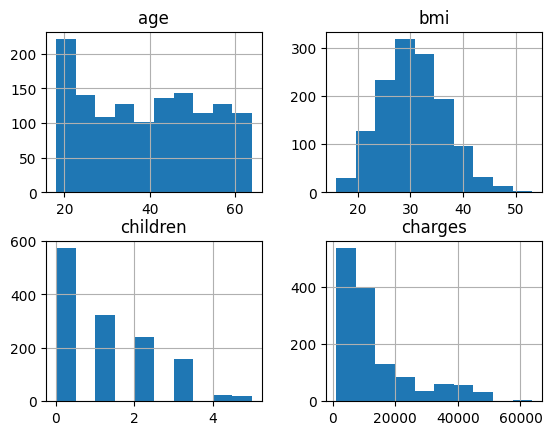

In [20]:
# Histogram 
insurance_clean.hist()
plt.show()

In [22]:
insurance_clean.shape

(1337, 7)

In [23]:
insurance_clean.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

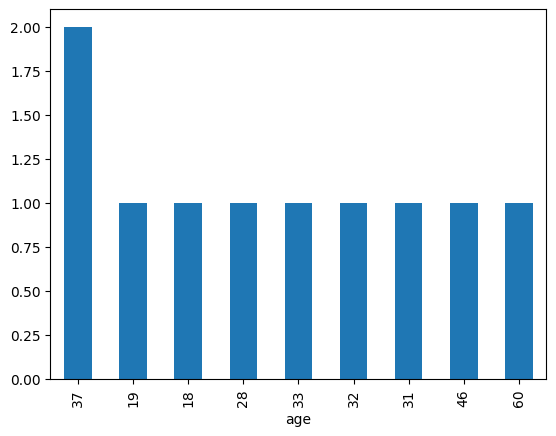

In [24]:
insurance_clean['age'].head(10).value_counts().plot(kind='bar')
plt.show()

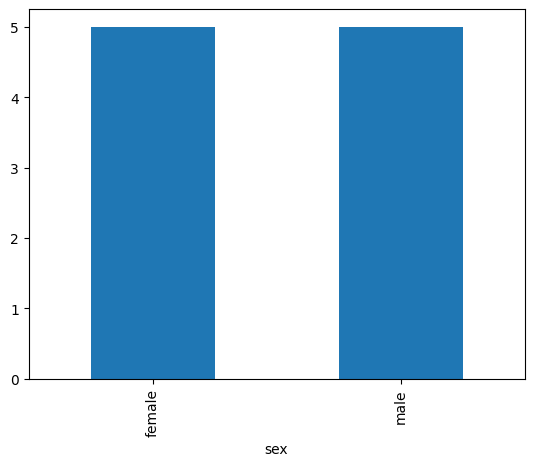

In [25]:
insurance_clean['sex'].head(10).value_counts().plot(kind='bar')
plt.show()

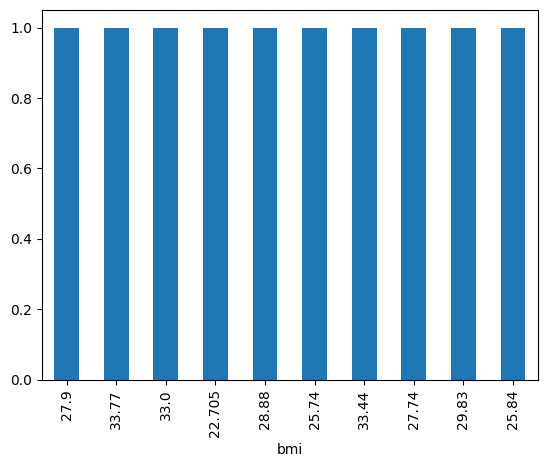

In [26]:
insurance_clean['bmi'].head(10).value_counts().plot(kind='bar')
plt.show()

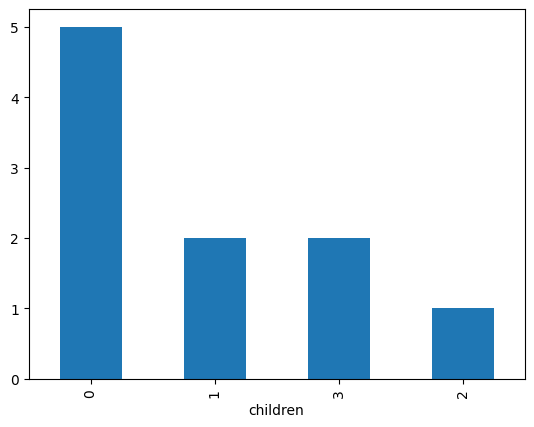

In [27]:
insurance_clean['children'].head(10).value_counts().plot(kind='bar')
plt.show()

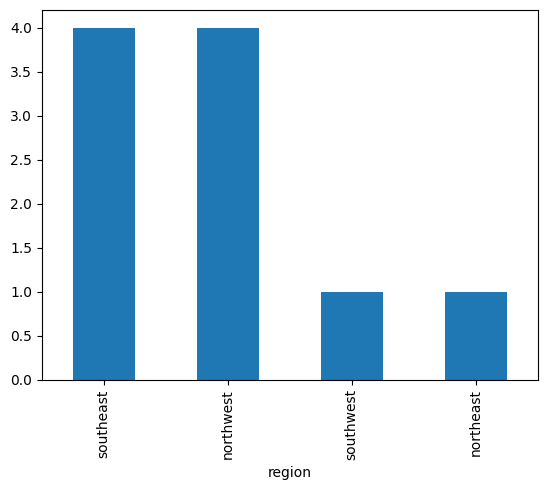

In [28]:
insurance_clean['region'].head(10).value_counts().plot(kind='bar')
plt.show()

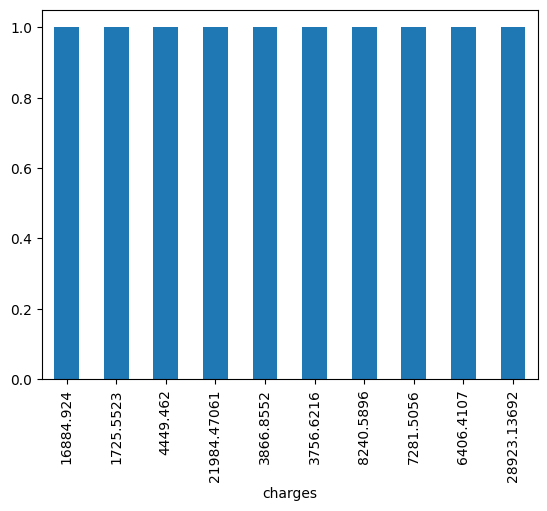

In [29]:
insurance_clean['charges'].head(10).value_counts().plot(kind='bar')
plt.show()

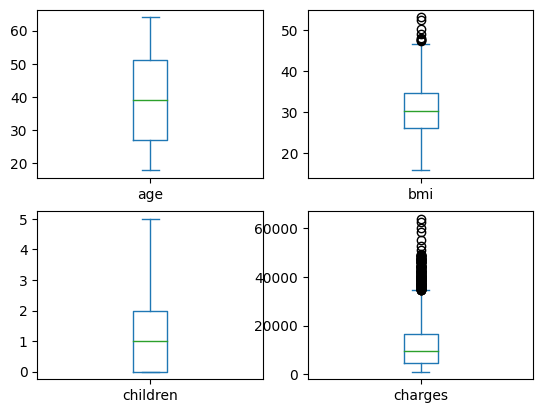

In [34]:
# box and whisker plots
insurance_clean.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Calculate Probabilty Of Insurance Cost 

In [36]:
# Charges, Age, Bmi, Smoker

from scipy.stats import chi2_contingency

df = insurance_clean

data = df

# Define a function to perform Chi-square test and print results
def perform_chi2_test(df, col1, col2):
    # Creating a contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])
    # Performing the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Printing results
    print(f"Chi-square test between {col1} and {col2}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("\n")

# Perform Chi-square tests for specified relationships ( refer to columns )
perform_chi2_test(data, 'age', 'charges')
perform_chi2_test(data, 'bmi', 'charges')
perform_chi2_test(data, 'smoker', 'charges')

Chi-square test between age and charges:
Chi-square statistic: 61501.99999999999
P-value: 0.44706630549927795
Degrees of freedom: 61456


Chi-square test between bmi and charges:
Chi-square statistic: 731339.0000000001
P-value: 0.3253126757365055
Degrees of freedom: 730792


Chi-square test between smoker and charges:
Chi-square statistic: 1337.0
P-value: 0.48714133732590076
Degrees of freedom: 1336




1. Chi-Square Test between Sex and Charges:

* Chi-Square Statistic: The value is 1337.0. This statistic measures how much the observed data deviates from the expected data under the assumption that there is no association between sex (male or female) and insurance charges.

* P-Value: With a p-value of 0.49, we find weak evidence against the null hypothesis (no association). In other words, there is no strong indication that sex significantly influences insurance charges.

* Degrees of Freedom: There are 1336 degrees of freedom for this test.



2. Chi-Square Test between Children and Charges:

* Chi-Square Statistic: The value is approximately 6685. This statistic quantifies the deviation between observed and expected data when comparing the number of children (dependents) and insurance charges.

* P-Value: The p-value is 0.48, suggesting that there is no strong evidence against the null hypothesis (no association). The number of children does not significantly impact insurance charges.

* Degrees of Freedom: There are 6680 degrees of freedom for this test.



3. Chi-Square Test between Region and Charges:

* Chi-Square Statistic: The value is 4011.0. It represents the deviation between observed and expected data when considering different regions and their influence on insurance charges.

* P-Value: With a p-value of 0.48, there is no substantial evidence against the null hypothesis (no association). The region of residence does not significantly affect insurance charges.

* Degrees of Freedom: There are 4008 degrees of freedom for this test.

In [37]:
# Sex, Children, Region

from scipy.stats import chi2_contingency

df = insurance_clean

data = df

# Define a function to perform Chi-square test and print results
def perform_chi2_test(df, col1, col2):
    # Creating a contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])
    # Performing the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Printing results
    print(f"Chi-square test between {col1} and {col2}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("\n")

# Perform Chi-square tests for specified relationships ( refer to columns )
perform_chi2_test(data, 'sex', 'charges')
perform_chi2_test(data, 'children', 'charges')
perform_chi2_test(data, 'region', 'charges')

Chi-square test between sex and charges:
Chi-square statistic: 1337.0
P-value: 0.48714133732590076
Degrees of freedom: 1336


Chi-square test between children and charges:
Chi-square statistic: 6684.999999999997
P-value: 0.4804538043903806
Degrees of freedom: 6680


Chi-square test between region and charges:
Chi-square statistic: 4011.0
P-value: 0.4836699052318591
Degrees of freedom: 4008




1. Chi-Square Test between Sex and Charges :

    -Chi-Square Statistic: The value is 1337.0. This statistic measures how much the observed data deviates from the expected data under the assumption that there is no association between sex (male or female) and insurance charges.
    
* P-Value: With a p-value of 0.49, we find weak evidence against the null hypothesis (no association). In other words, there is no strong indication that sex significantly influences insurance charges.

* Degrees of Freedom: There are 1336 degrees of freedom for this test.



2. Chi-Square Test between Children and Charges:

* Chi-Square Statistic: The value is approximately 6685. This statistic quantifies the deviation between observed and expected data when comparing the number of children (dependents) and insurance charges.

* P-Value: The p-value is 0.48, suggesting that there is no strong evidence against the null hypothesis (no association). The number of children does not significantly impact insurance charges.

* Degrees of Freedom: There are 6680 degrees of freedom for this test.



3. Chi-Square Test between Region and Charges :

* Chi-Square Statistic : The value is 4011.0. It represents the deviation between observed and expected data when considering different regions and their influence on insurance charges.

* P-Value: With a p-value of 0.48, there is no substantial evidence against the null hypothesis (no association). The region of residence does not significantly affect insurance charges.

* Degrees of Freedom : There are 400 degrees of freedom for this test.

Correlation Heatmap

In [38]:
# Compute correlation matrix for the encoded data
correlation_matrix_encoded = insurance_clean.select_dtypes(include=['number']).corr()

In [39]:
correlation_matrix_encoded

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


One Hot Encoding

In [45]:
insurance_clean.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
data.copy = insurance_clean

# Fill missing numeric values with the median
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Convert categorical variables to numeric by one-hot encoding
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
data = pd.get_dummies(data, columns=categorical_cols)


Train Model with linear regression

In [54]:
# Define the features (X) and the target variable (y)
X = data.drop('charges', axis=1)  # Assuming 'Price per kilogram' is the target
y = data['charges']

# Split the data into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Example model training and evaluation with Linear Regression
model = LinearRegression()
model.fit(X_train, Y_train)

# Predicting on the validation set
Y_pred = model.predict(X_validation)

# Calculating the mean squared error
mse = mean_squared_error(Y_validation, Y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 16216256.144095756


In [57]:
# Convert to numeric data

df = insurance_clean

df['age'] = pd.to_numeric(df['age'], errors='coerce')
print(df)

      age     sex     bmi  children smoker     region      charges  rating
0      19  female  27.900         0    yes  southwest  16884.92400    1005
1      18    male  33.770         1     no  southeast   1725.55230      57
2      28    male  33.000         3     no  southeast   4449.46200     306
3      33    male  22.705         0     no  northwest  21984.47061    1097
4      32    male  28.880         0     no  northwest   3866.85520     254
...   ...     ...     ...       ...    ...        ...          ...     ...
1333   50    male  30.970         3     no  northwest  10600.54830     746
1334   18  female  31.920         0     no  northeast   2205.98080     118
1335   18  female  36.850         0     no  southeast   1629.83350      32
1336   21  female  25.800         0     no  southwest   2007.94500      91
1337   61  female  29.070         0    yes  northwest  29141.36030    1171

[1337 rows x 8 columns]


/tmp/ipykernel_33/1424193297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.to_numeric(df['age'], errors='coerce')


In [60]:
df = insurance_clean

df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
print(df)

      age  sex     bmi  children smoker     region      charges  rating  \
0      19  NaN  27.900         0    yes  southwest  16884.92400    1005   
1      18  NaN  33.770         1     no  southeast   1725.55230      57   
2      28  NaN  33.000         3     no  southeast   4449.46200     306   
3      33  NaN  22.705         0     no  northwest  21984.47061    1097   
4      32  NaN  28.880         0     no  northwest   3866.85520     254   
...   ...  ...     ...       ...    ...        ...          ...     ...   
1333   50  NaN  30.970         3     no  northwest  10600.54830     746   
1334   18  NaN  31.920         0     no  northeast   2205.98080     118   
1335   18  NaN  36.850         0     no  southeast   1629.83350      32   
1336   21  NaN  25.800         0     no  southwest   2007.94500      91   
1337   61  NaN  29.070         0    yes  northwest  29141.36030    1171   

        col1  
0     27.900  
1     33.770  
2     33.000  
3     22.705  
4     28.880  
...      

/tmp/ipykernel_33/1351133332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')


In [61]:
df = insurance_clean

df['charges'] = pd.to_numeric(df['charges'], errors='coerce')
print(df)

      age  sex     bmi  children smoker     region      charges  rating  \
0      19  NaN  27.900         0    yes  southwest  16884.92400    1005   
1      18  NaN  33.770         1     no  southeast   1725.55230      57   
2      28  NaN  33.000         3     no  southeast   4449.46200     306   
3      33  NaN  22.705         0     no  northwest  21984.47061    1097   
4      32  NaN  28.880         0     no  northwest   3866.85520     254   
...   ...  ...     ...       ...    ...        ...          ...     ...   
1333   50  NaN  30.970         3     no  northwest  10600.54830     746   
1334   18  NaN  31.920         0     no  northeast   2205.98080     118   
1335   18  NaN  36.850         0     no  southeast   1629.83350      32   
1336   21  NaN  25.800         0     no  southwest   2007.94500      91   
1337   61  NaN  29.070         0    yes  northwest  29141.36030    1171   

        col1  
0     27.900  
1     33.770  
2     33.000  
3     22.705  
4     28.880  
...      

/tmp/ipykernel_33/541314858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['charges'] = pd.to_numeric(df['charges'], errors='coerce')


In [62]:
df = insurance_clean

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
print(df)

      age  sex     bmi  children smoker     region      charges  rating  \
0      19  NaN  27.900         0    yes  southwest  16884.92400    1005   
1      18  NaN  33.770         1     no  southeast   1725.55230      57   
2      28  NaN  33.000         3     no  southeast   4449.46200     306   
3      33  NaN  22.705         0     no  northwest  21984.47061    1097   
4      32  NaN  28.880         0     no  northwest   3866.85520     254   
...   ...  ...     ...       ...    ...        ...          ...     ...   
1333   50  NaN  30.970         3     no  northwest  10600.54830     746   
1334   18  NaN  31.920         0     no  northeast   2205.98080     118   
1335   18  NaN  36.850         0     no  southeast   1629.83350      32   
1336   21  NaN  25.800         0     no  southwest   2007.94500      91   
1337   61  NaN  29.070         0    yes  northwest  29141.36030    1171   

        col1  
0     27.900  
1     33.770  
2     33.000  
3     22.705  
4     28.880  
...      

/tmp/ipykernel_33/4128496000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
